In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
def header_data_std(Frame):
    cols = []
    for i in range (len(Frame.columns)):
        cols.append(Frame.columns[i].lower().replace(" ","_"))
    return cols

In [33]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [34]:
data.columns = header_data_std(data)

In [35]:
data = data.rename(columns={ 'unnamed:_0':'index'})

In [36]:
data = data.drop_duplicates()

In [37]:
null_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
null_df = null_df.reset_index()
null_df.columns = ['header','percentage_nulls']

In [38]:
columns_drop = null_df[null_df['percentage_nulls']>6]['header']

In [39]:
data = data.drop(columns_drop,axis=1)

In [40]:
data.shape

(9134, 24)

In [41]:
data = data.drop_duplicates()

In [42]:
data.describe(include = "all")

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


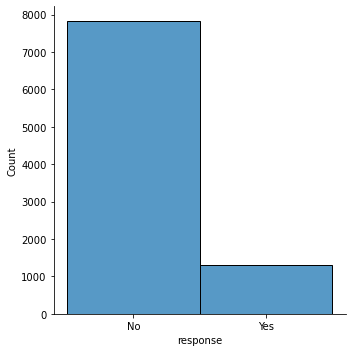

In [43]:
# Show a plot of the total number of responses.
sns.displot(data['response'])
plt.show()

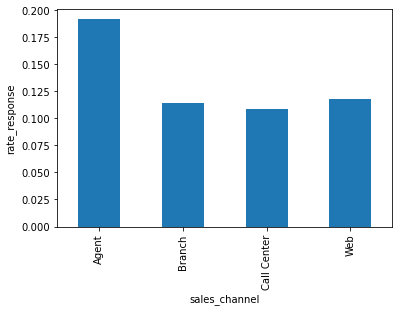

In [44]:
int_response= lambda x: 1 if x=='Yes' else 0

data['int_response']=list(map(int_response, data['response']))
data.groupby('sales_channel')['int_response'].mean().plot(kind='bar')
plt.ylabel('rate_response')
plt.show()

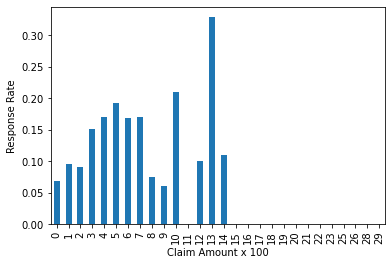

In [45]:
#Show a plot of the response rate by the total claim amount
data.groupby(round(data['total_claim_amount']/100, 0).astype(int))['int_response'].mean().plot(kind='bar')
plt.xlabel('Claim Amount x 100')
plt.ylabel('Response Rate')
plt.show()

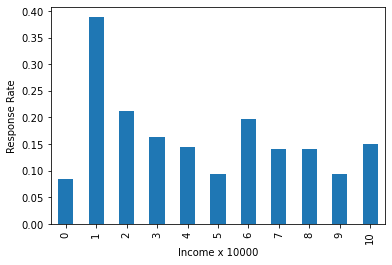

In [46]:
# Show a plot of the response rate by income
data.groupby(round(data['income']/10000, 0).astype(int))['int_response'].mean().plot(kind='bar')
plt.xlabel('Income x 10000')
plt.ylabel('Response Rate')
plt.show()

In [47]:
data.describe(include = "all")

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,int_response
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,3,9,4,4,NaN,6,3,NaN
top,BU79786,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize,NaN
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424,NaN
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN,0.143201
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN,0.350297
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN,0.000000
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN,0.000000
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN,0.000000
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN,0.000000


In [48]:
#Check the data types of the columns
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
int_response    

In [49]:
#Get the numeric data into dataframe called numerical
numerical = data.select_dtypes(include = np.number)

In [50]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,int_response
0,2763.519279,56274,69,32,5,0,1,384.811147,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0
3,7645.861827,0,106,18,65,0,7,529.881344,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0


In [51]:
#and categorical columns in a dataframe called categoricals
categoricals = data.select_dtypes(include = object)

In [52]:
categoricals.head()


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


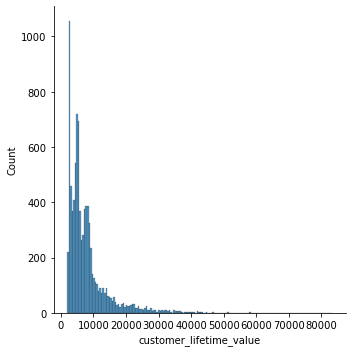

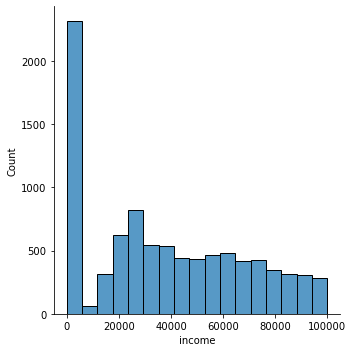

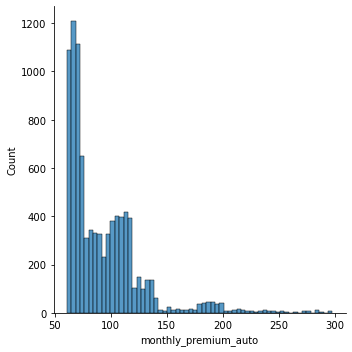

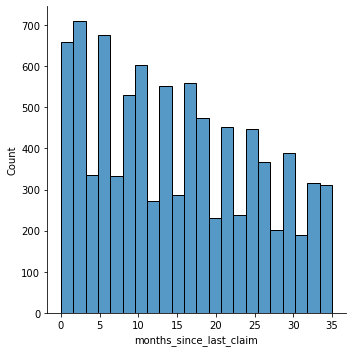

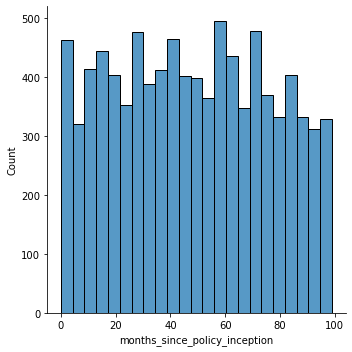

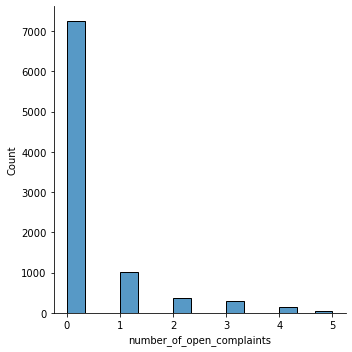

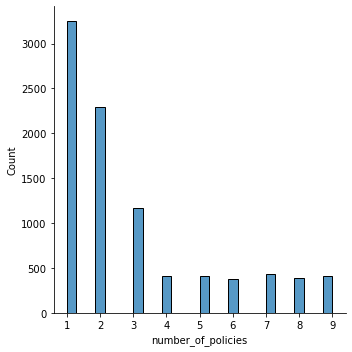

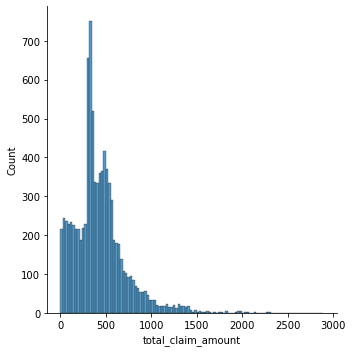

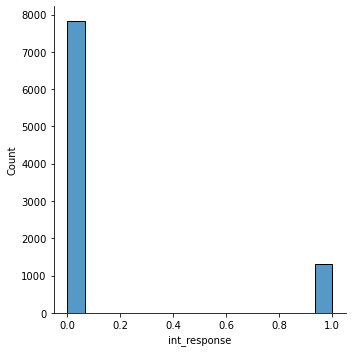

In [53]:
# Use seaborn library to construct distribution plots for the numerical variables
for x in numerical.columns:
    sns.displot(numerical[x])

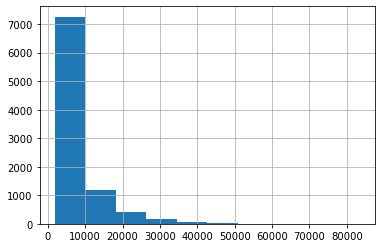

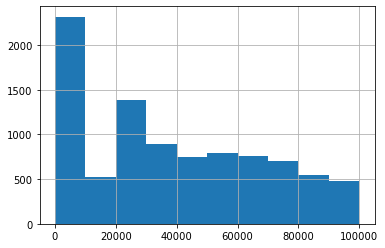

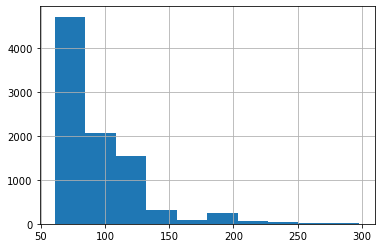

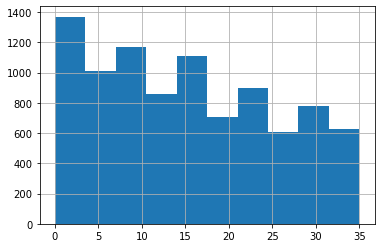

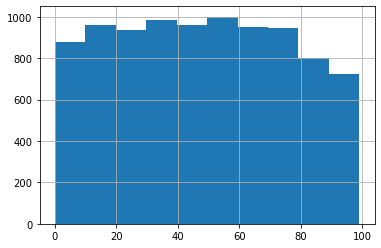

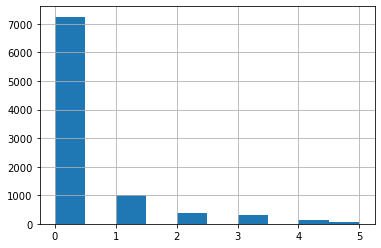

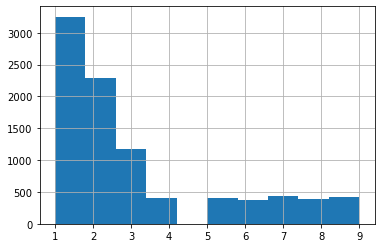

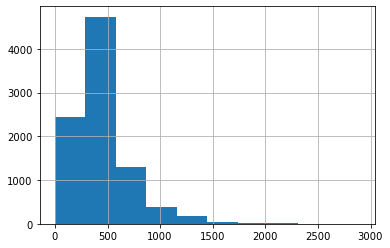

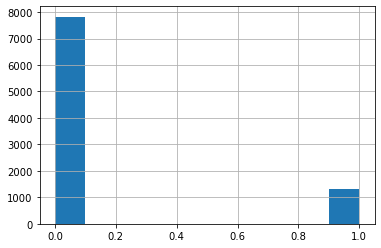

In [54]:
#Use Matplotlib to construct histograms
#for x in numerical.columns:
#    sns.histplot(numerical[x])
#    plt.show()
for X in numerical.columns:
    numerical[X].hist()
    plt.show()

#Do the distributions for different numerical variables look like a normal distribution
#maybe "Total Claim Amount" a bit

In [55]:
#For the numerical variables, check the multicollinearity between the features.
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,int_response
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.008930
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.011932
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.010966
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.016597
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.002952
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.009881
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,-0.020891
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.016877
int_response,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877,1.000000


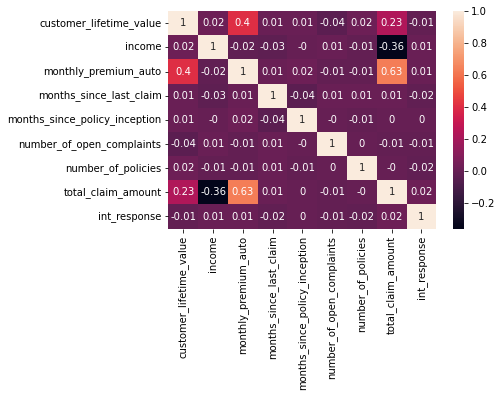

In [56]:
sns.heatmap(round(numerical.corr(),2), annot=True)
plt.show()

In [57]:
#.63 is the maximun correlation no drops

In [58]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
int_response                     0
dtype: int64

##Customer Analysis Round 5 

In [62]:
#X-y split.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [63]:
X=data.drop(['total_claim_amount'], axis=1)
y=data['total_claim_amount']
X.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,int_response
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0


In [64]:
#Normalize (numerical).
transformer = MinMaxScaler().fit(numerical) ### THIS IS THE ONE FOR NORMALIZING
x_minmax = transformer.transform(numerical)
print(x_minmax.shape)

(9134, 9)


In [68]:
x_minmax

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.        , 0.13297388,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.875     , 0.39105113,
        0.        ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.125     , 0.19576416,
        0.        ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.125     , 0.27329676,
        0.        ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.25      , 0.2388757 ,
        0.        ],
       [0.00876645, 0.        , 0.06751055, ..., 0.        , 0.12771622,
        0.        ]])